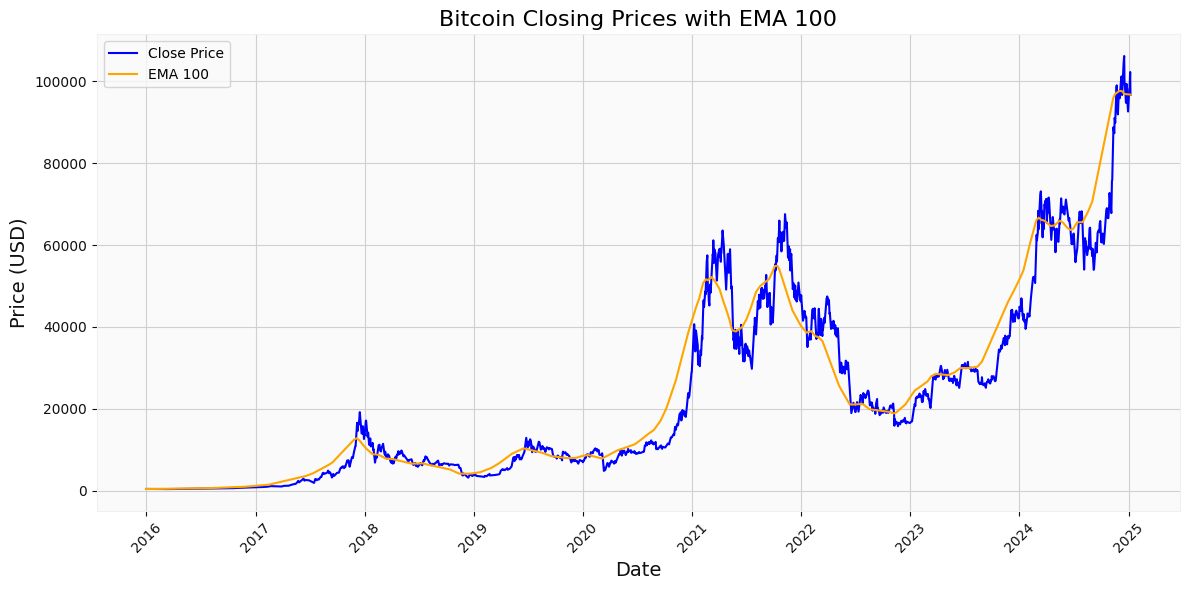

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./Bitstamp_BTCUSD_d.csv')
data['date'] = pd.to_datetime(data['date'])

#remove pre 2016
data = data[data['date'] >= '2016-01-01']
data['EMA_100'] = data['close'].ewm(span=100, adjust=False).mean()

plt.figure(figsize=(12, 6))

# Plot close prices
plt.plot(data['date'], data['close'], label='Close Price', color='blue')

# Plot EMA
plt.plot(data['date'], data['EMA_100'], label='EMA 100', color='orange')

# titles and labels
plt.title('Bitcoin Closing Prices with EMA 100', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from ta.trend import PSARIndicator
data['daily_return'] = data['close'].pct_change()

# Calculate basic statistics
mean_return = data['daily_return'].mean()
std_dev = data['daily_return'].std()
annualized_volatility = std_dev * np.sqrt(365)  # Assuming 365 period


print("Basic Data Information:")
print(f"Mean Daily Return: {mean_return:.6f}")
print(f"Daily Volatility (Standard Deviation): {std_dev:.6f}")
print(f"Annualized Volatility: {annualized_volatility:.6f}")

# Display data summary
print("\nData Summary:")
print(data.describe())

Basic Data Information:
Mean Daily Return: -0.000965
Daily Volatility (Standard Deviation): 0.037974
Annualized Volatility: 0.725483

Data Summary:
               unix                 date          open          high  \
count  3.264000e+03                 3264   3264.000000    3264.00000   
mean   1.592568e+09  2020-06-19 12:00:00  21744.973903   22275.52754   
min    1.451606e+09  2016-01-01 00:00:00    360.000000     374.00000   
25%    1.522087e+09  2018-03-26 18:00:00   5350.017500    5557.43250   
50%    1.592568e+09  2020-06-19 12:00:00  11159.080000   11501.62000   
75%    1.663049e+09  2022-09-13 06:00:00  35814.607500   37275.25250   
max    1.733530e+09  2024-12-07 00:00:00  99898.000000  103647.00000   
std    8.142163e+07                  NaN  21401.530356   21896.52279   

                low         close    Volume BTC    Volume USD  daily_return  
count   3264.000000   3264.000000  3.264000e+03  3.264000e+03   3263.000000  
mean   21180.924789  21775.646373  1.032265e+07

Chart saved as bitcoin_candlestick_chart_ema100_rsi_with_legend.png


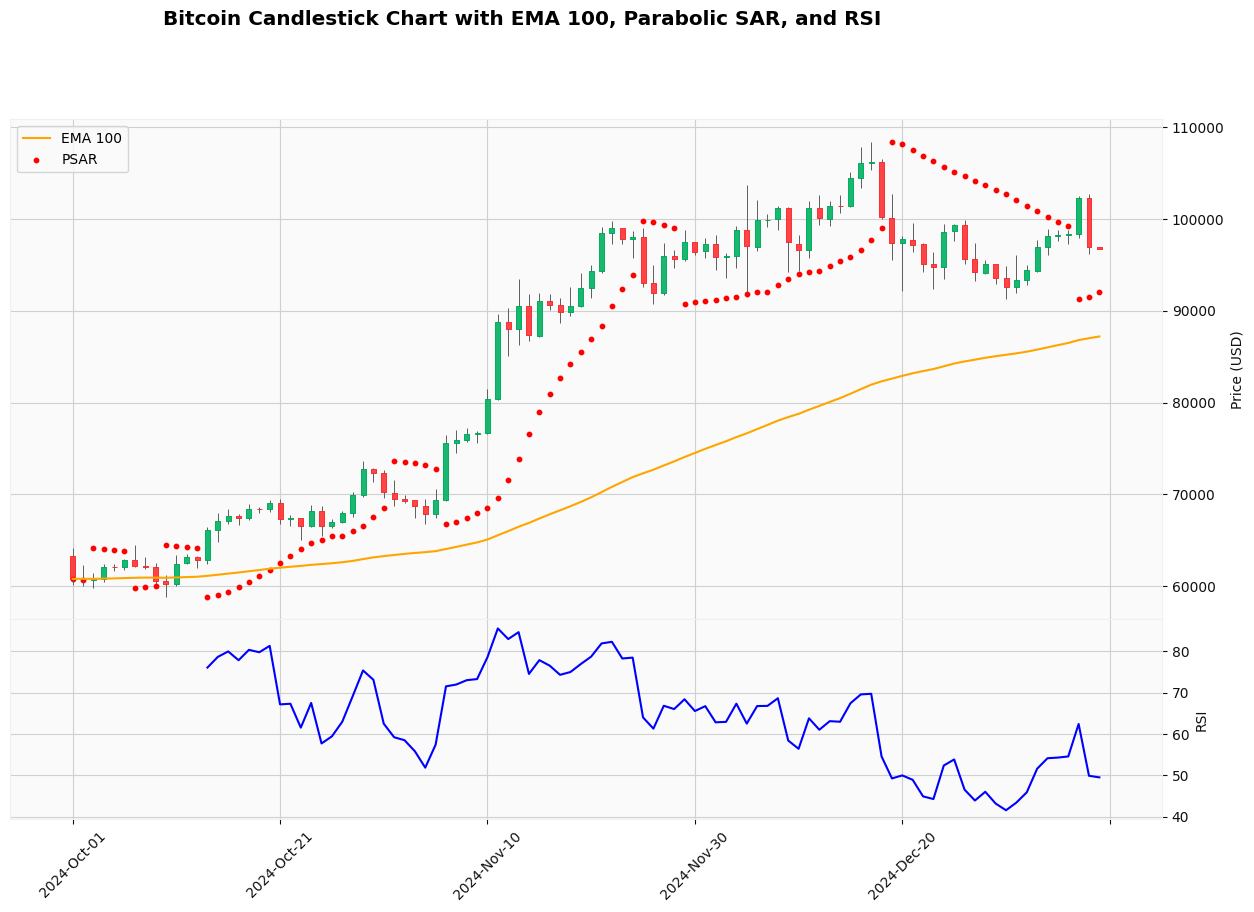

In [2]:
import pandas as pd
import mplfinance as mpf
from ta.trend import PSARIndicator
from ta.momentum import RSIIndicator

ema_span = 100  #define the EMA period

data = pd.read_csv('./Bitstamp_BTCUSD_d.csv')  # .csv file with daily data

# ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# only dates from specified (for readability)
data = data[data['date'] >= '2024-10-01']

# set'date' column as the index (required for mplfinance)
data.set_index('date', inplace=True)

data = data[::-1]  # Reverse the data order

# calculate EMA
data[f'EMA_{ema_span}'] = data['close'].ewm(span=ema_span, adjust=False).mean()

psar = PSARIndicator(
    high=data['high'],
    low=data['low'],
    close=data['close'],
    step=0.02,  # Default acceleration factor
    max_step=0.2  # Default maximum acceleration factor
)
data['psar'] = psar.psar()

# calculate RSI
rsi_period = 14  # Typical RSI period is 14
rsi = RSIIndicator(close=data['close'], window=rsi_period)
data['RSI'] = rsi.rsi()

# prepare the additional EMA, PSAR overlays, and RSI subplot for mplfinance
additional_plots = [
    mpf.make_addplot(data[f'EMA_{ema_span}'], color='orange', width=1.5, label=f'EMA {ema_span}'),
    mpf.make_addplot(data['psar'], color='red', scatter=True, markersize=10, label='PSAR'),
    mpf.make_addplot(data['RSI'], panel=1, color='blue', width=1.5, ylabel='RSI')  # Add RSI as a subplot
]

# plot candlesticks
fig, axlist = mpf.plot(
    data,
    type='candle',
    style='yahoo',
    addplot=additional_plots,
    title=f'Bitcoin Candlestick Chart with EMA {ema_span}, Parabolic SAR, and RSI',
    ylabel='Price (USD)',
    figsize=(16, 10),
    volume=False,  # Set to True if you want a volume subplot
    returnfig=True  # Required to modify legend position
)

# adjust legend position to upper left
for ax in axlist:
    handles, labels = ax.get_legend_handles_labels()
    if handles:  # Check if there are any handles to avoid errors
        ax.legend(handles, labels, loc='upper left')  # Move legend to top left

# save output .png
output_file = f'bitcoin_candlestick_chart_ema{ema_span}_rsi_with_legend.png'
fig.savefig(output_file)

print(f"Chart saved as {output_file}")
